In [1]:
import pandas as pd
import sys
sys.path.append('../')
from Model import Model

In [2]:
inp_df = pd.read_excel('Agg_data_from_frame_251.xlsx',sheet_name="Sheet1")

In [3]:
model = Model('ranf')

In [4]:
Y_old = model.preprocessing.load_Y('Updated_targets_300519.xlsx',video_name=False,column_name="diff")
Y_new = model.preprocessing.load_Y('new_targets_21062019.xlsx',video_name=False,column_name="same")
Y_unaided = model.preprocessing.load_Y('Agg_Unaided.xlsx',video_name=False,column_name="same")

In [5]:
# Y_old = pd.read_excel('Updated_targets_300519.xlsx')
# Y_new = pd.read_excel('new_targets_21062019.xlsx')
# Y_unaided = pd.read_excel('Agg_Unaided.xlsx')

In [6]:
Y_old = Y_old.drop(['Unaided_Branding'],1)

In [7]:
Y_raw = pd.concat([Y_old,Y_new,Y_unaided],1)
# Y_raw = Y_raw.drop(['Video Name'],1)

In [8]:
Y_raw.columns

Index(['Brand_Cues__Mean', 'Aided_Branding__Mean', 'Active_Involvement__Mean',
       'New_Information__Mean', 'Enjoyment__Mean', 'Brand_Appeal__Mean',
       'Understanding__Mean', 'Relevance_of_Information__Mean',
       'Credibility_of_Information__Mean', 'Brand_Difference__Mean',
       'Interest_peak', 'Interest_mean_score', 'Purchase_intent',
       'Persuasion_mean', 'Persuasion_very_likely', 'Interest_peak_frames',
       'Unaided Branding'],
      dtype='object')

In [9]:
Y_raw.isna().sum()

Brand_Cues__Mean                    1
Aided_Branding__Mean                1
Active_Involvement__Mean            1
New_Information__Mean               1
Enjoyment__Mean                     1
Brand_Appeal__Mean                  1
Understanding__Mean                 1
Relevance_of_Information__Mean      1
Credibility_of_Information__Mean    1
Brand_Difference__Mean              1
Interest_peak                       0
Interest_mean_score                 0
Purchase_intent                     0
Persuasion_mean                     0
Persuasion_very_likely              0
Interest_peak_frames                0
Unaided Branding                    1
dtype: int64

In [10]:
Y_raw = Y_raw.dropna()

In [11]:
from pandas import *
import numpy as np
#from libraries.settings import *
from scipy.stats.stats import pearsonr
import itertools

<h1> Pairwise correlations

In [12]:
correlations = {}
columns = Y_raw.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '?' + col_b] = pearsonr(Y_raw.loc[:, col_a], Y_raw.loc[:, col_b])

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                                         PCC       p-value
Active_Involvement__Mean?Brand_Appeal__Mean         0.308650  3.930997e-04
Active_Involvement__Mean?Brand_Difference__Mean     0.446097  1.310649e-07
Active_Involvement__Mean?Credibility_of_Informa...  0.225419  1.051783e-02
Active_Involvement__Mean?Enjoyment__Mean            0.304233  4.805291e-04
Active_Involvement__Mean?Interest_mean_score        0.381812  8.707751e-06
Active_Involvement__Mean?Interest_peak              0.383756  7.765848e-06
Active_Involvement__Mean?Interest_peak_frames       0.164495  6.353094e-02
Active_Involvement__Mean?New_Information__Mean      0.450779  9.320503e-08
Active_Involvement__Mean?Persuasion_mean            0.489629  4.483149e-09
Active_Involvement__Mean?Persuasion_very_likely     0.466996  2.749084e-08
Active_Involvement__Mean?Purchase_intent            0.282937  1.211953e-03
Active_Involvement__Mean?Relevance_of_Informati...  0.209699  1.751689e-02
Active_Involvement__Mean?

In [13]:
corr_df = pd.DataFrame(columns=["Variable","by Variable","Corr","Count","P-value"],index=sorted(result.index.tolist()))

In [14]:
corr_df['Corr'] = result['PCC'].round(3)

In [15]:
corr_df['Variable'] = [row.split('?')[0] for row in corr_df.index]
corr_df['by Variable'] = [row.split('?')[1] for row in corr_df.index]

In [16]:
corr_df['P-value'] = result['p-value'].round(4)

In [17]:
corr_df['Count'] = 128

In [18]:
corr_df.to_excel('Pairwise_corr.xlsx')

In [19]:
result.to_excel('Pairwise_Corr_Dep.xlsx')

<h1> Principal Component Analysis

In [20]:
from sklearn.preprocessing import StandardScaler
Y_raw_std = StandardScaler().fit_transform(Y_raw)

In [21]:
Y_raw.shape

(128, 17)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17,random_state=1)
pca.fit(Y_raw_std)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
print(pca.explained_variance_.round(2))

[7.25 2.6  1.81 1.25 0.82 0.68 0.52 0.47 0.37 0.32 0.28 0.2  0.18 0.14
 0.13 0.1  0.  ]


In [24]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([42.29, 57.47, 68.02, 75.34, 80.12, 84.08, 87.1 , 89.82, 91.99,
       93.86, 95.52, 96.71, 97.78, 98.62, 99.38, 99.97, 99.97])

In [25]:
np.arange(1,17)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [26]:
pca_analysis = pd.DataFrame(index=np.arange(1,18),columns=["Eigenvalue","Percent","Cum Percent"])

In [27]:
for i in range(17):
    pca_analysis.iloc[i]=[pca.explained_variance_.round(2)[i],(np.round(pca.explained_variance_ratio_,decimals=4)*100)[i],var1[i]]

In [28]:
pca_analysis.to_excel('./PCA.xlsx')

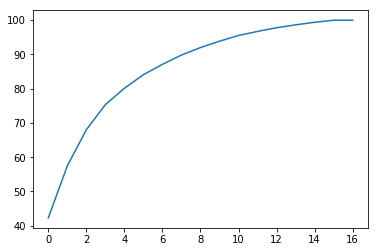

In [29]:
import matplotlib.pyplot as plt
plt.plot(var1)

In [30]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer


transformer = FactorAnalysis(n_components=4, random_state=0)
transformed = transformer.fit_transform(Y_raw_std)

In [31]:
fa = FactorAnalyzer(17,rotation=None)
fa.fit(Y_raw)
# fa.analyze(Y_raw,25,rotation=None)
ev,v = fa.get_eigenvalues()

In [32]:
fa = FactorAnalyzer(4,rotation='varimax')
fa.fit(Y_raw)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=4, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [33]:
fa_analysis = pd.DataFrame(fa.loadings_,index=Y_raw.columns,columns=["Factor 1","Factor 2","Factor 3","Factor 4"])

In [34]:
fa_analysis.to_excel('./FactorLoading.xlsx')

In [35]:
transformed_df = fa.transform(Y_raw)

In [36]:
pd.DataFrame(data=transformer.components_[0:,0:],columns=Y_raw.columns).T

,0,1,2,3
Brand_Cues__Mean,-0.336176,0.601428,-0.339980,-0.145881
Aided_Branding__Mean,-0.224907,0.557418,-0.392093,0.053938
Active_Involvement__Mean,-0.383812,-0.183059,-0.556159,0.230508
New_Information__Mean,-0.626377,0.381148,-0.350040,0.223753
Enjoyment__Mean,-0.669612,0.424548,-0.151437,0.075986
Brand_Appeal__Mean,-0.616481,0.538142,-0.304688,0.191158
Understanding__Mean,-0.462594,0.515900,-0.289397,-0.500946
Relevance_of_Information__Mean,-0.335453,0.543459,-0.293900,0.020822
Credibility_of_Information__Mean,-0.560194,0.636104,-0.245995,-0.014284
Brand_Difference__Mean,-0.727302,0.439652,-0.254282,0.169864


In [37]:
transformed_df[:,0]

array([ 2.71526477,  2.16707533,  0.73960299,  1.28367563, -0.19618711,
        0.52146355,  0.83327536, -0.38680501,  0.96697359, -0.03698476,
        0.73092445,  0.91838895, -0.68014826, -0.96375787, -0.91971399,
       -0.65099671,  1.36361944, -0.24588885, -0.77599608, -0.0273245 ,
       -0.46628525, -0.2574076 ,  1.65617686, -0.05647718, -1.36044995,
        0.66836671, -0.51994479,  0.04712594,  1.54745896, -0.58677053,
        1.18218736, -0.46652011, -0.53751501,  0.48025916, -0.59460548,
       -0.39136621, -1.14781492,  1.68235649,  0.82058273, -0.24802356,
        0.56419669,  0.9694247 , -0.30431397, -0.07785216,  0.28160623,
        0.41141867, -1.74217199,  0.40881015,  0.07657659, -1.87665331,
       -0.92343819,  1.77984227,  1.90313064, -0.81779931, -0.26500431,
        0.18195237, -0.14194035, -0.61242047, -0.57808563,  0.55659366,
        1.31481239,  1.61877025,  1.14484398,  0.98967452,  0.00341456,
        0.32932952,  0.6428436 , -1.29712004, -0.14444668,  0.19

In [38]:
inp_df = inp_df.set_index(inp_df['Video Name'])

In [39]:
inp_df.columns.values

array(['Video Name', 'African_frame_count', 'Caucasian_frame_count',
       'Eastasian_frame_count', 'Latino_frame_count', 'African_dur',
       'Caucasian_dur', 'Eastasian_dur', 'Latino_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'Country_US', 'Country_UK',
       'Country_AU', 'length_of_ad_15', 'ad_type_tv',
       'Age: 0-15_frame_count', 'Age: 15-24_frame_count',
       'Age: 25-34_frame_count', 'Age: 35-44_frame_count',
       'Age: 45-60_frame_count', 'Female_frame_count', 'Male_frame_count',
       'Female_dur', 'Male_dur', 'Age: 0-15_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur', 'microsoft',
       'microsoft_dur', 'microsoft_first_ocr', 'microsoft_last_ocr',
       'microsoft_total_o

In [40]:
def filter_df(col):
    filtered_df = inp_df.loc[inp_df['Country_US']==1,[col,'Country_US']]
    filtered_df.dropna(inplace=True)    
    y_filtered = Y_raw.loc[filtered_df.index]  
    y_filtered= y_filtered.dropna(how='all')
    filtered_df = filtered_df.loc[y_filtered.index]
    y_data =fa.transform(y_filtered) 
    return y_data,filtered_df

#### CHI-SQUARE TEST, ANOVA

In [41]:
from scipy.stats import f_oneway
from sklearn.feature_selection import chi2,f_regression
from statsmodels.formula.api import ols
from statsmodels.api import stats

###### Microsoft-Logo

In [42]:
def anova_analyis(col):
    y,x= filter_df(col)
    print(f_oneway(y[:,0:1],x[[col]]))
    
    df = pd.DataFrame(index=x.index,columns=[col,'Factor_1','Factor_2','Factor_3','Factor_4'])
    df[col] = x[col]
    df[['Factor_1','Factor_2','Factor_3','Factor_4']] = y
    results = ols('Factor_4 ~ C('+col+')', data=df).fit()  
    
    aov_table =stats.anova_lm(results, typ=2)
    print(aov_table)
    
#     return results.summary()

In [43]:
inp_df.index = inp_df['Video Name']
filtered_df = inp_df.loc[inp_df['Country_US']==1,]
#filtered_df.dropna(inplace=True)    
y_filtered = Y_raw.loc[filtered_df.index]  
y_filtered= y_filtered.dropna(how='all')
filtered_df = filtered_df.loc[y_filtered.index]

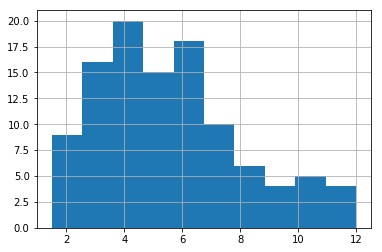

In [44]:
filtered_df['microsoft_dur'].hist()

In [45]:
msoft_bins = filtered_df['microsoft_dur']

In [46]:
high_ind = msoft_bins[filtered_df['microsoft_dur']>=7].index
low_ind = msoft_bins[filtered_df['microsoft_dur']<=3].index
med_ind = msoft_bins[(filtered_df['microsoft_dur']>3 ) & (filtered_df['microsoft_dur']<7)].index


In [47]:
msoft_bins[high_ind] = "High"
msoft_bins[low_ind] = "Low"
msoft_bins[med_ind] = "Med"

In [48]:
df2 = pd.DataFrame(fa.transform(y_filtered))
df2.columns = ['Factor_1','Factor_2','Factor_3','Factor_4']
df2['msoft_bins'] = msoft_bins.values
results = ols('Factor_2 ~ C(msoft_bins)', data=df2).fit()  
aov_table =stats.anova_lm(results, typ=2)
print(aov_table)

                  sum_sq     df         F    PR(>F)
C(msoft_bins)   5.877562    2.0  3.246863  0.042872
Residual       94.131833  104.0       NaN       NaN


In [49]:
aov_table['PR(>F)'].values[1]

0.04287235024428715

### P-Value Table

In [50]:
imp_cols = []
for col in inp_df.columns.values:
    if 'dur' in col:
        imp_cols.append(col)
    elif '_first_ocr' in col:
        imp_cols.append(col)    
    elif '_last_ocr' in col:
        imp_cols.append(col)
    elif '_total_ocr' in col:
        imp_cols.append(col)
        

In [51]:
dur_cols = [col for col in inp_df.columns.values if 'dur' in col]

In [52]:
ocr_cols = [col for col in inp_df.columns.values if 'ocr' in col]

In [60]:
def bin_transform(df,cols):
    for col in cols:
        max_val = df[col].max()
        min_val = df[col].min()
        _30 = min_val+0.3*(max_val-min_val)
        _70 = min_val+0.7*(max_val-min_val)
        high_ind = df[df[col]>=_70].index
        low_ind = df[df[col]<=_30].index
        med_ind = df[(df[col]>_30 ) & (filtered_df[col]<_70)].index
        df.loc[high_ind,col] = "High"
        df.loc[low_ind,col] = "Low"
        df.loc[med_ind,col] = "Med"
    return df[cols]

In [54]:
inp_df.index = inp_df['Video Name']
inp_df[inp_df[dur_cols]==0.0] = np.NaN
filtered_df = inp_df.loc[inp_df['Country_US']==1,]
#filtered_df.dropna(inplace=True)    
y_filtered = Y_raw.loc[filtered_df.index]  
y_filtered= y_filtered.dropna(how='all')
filtered_df = filtered_df.loc[y_filtered.index]

In [84]:
from copy import deepcopy
import re
new_df =  deepcopy(filtered_df)  

In [85]:
new_df = bin_transform(new_df,imp_cols)

In [86]:
new_df.fillna('NA',inplace=True)

In [82]:
new_df.to_excel('Binned_df_for_dur&ocr.xlsx')

In [98]:
p_df = pd.DataFrame(index=imp_cols,columns=['Factor_1','Factor_2','Factor_3','Factor_4'])
df2 = pd.DataFrame(fa.transform(y_filtered))
df2.columns = ['Factor_1','Factor_2','Factor_3','Factor_4']
for col in  imp_cols:
    col_n = re.sub("[^a-zA-Z]", "",col)
#     col_n = col_n.replace(" ","")
#     print(col_n)
    df2[col_n] = new_df[col].values
    for factor in ['Factor_1','Factor_2','Factor_3','Factor_4']:
        try:
            results = ols(factor + ' ~ C('+col_n+')', data=df2).fit()  
            aov_table =stats.anova_lm(results, typ=2)
            p_df.loc[col,factor]= aov_table['PR(>F)'].values[0]
        except:
            print(col)

Currys PCs world_text_dur
Currys PCs world_text_dur
Currys PCs world_text_dur
Currys PCs world_text_dur
Currys PCs world_text_first_ocr
Currys PCs world_text_first_ocr
Currys PCs world_text_first_ocr
Currys PCs world_text_first_ocr
Currys PCs world_text_last_ocr
Currys PCs world_text_last_ocr
Currys PCs world_text_last_ocr
Currys PCs world_text_last_ocr
Currys PCs world_text_total_ocr
Currys PCs world_text_total_ocr
Currys PCs world_text_total_ocr
Currys PCs world_text_total_ocr


In [100]:
p_df.to_excel('p_values.xlsx')

In [117]:
sig_df = deepcopy(p_df)

In [118]:
sig_df[sig_df>0.05] = "INSIG"
sig_df[sig_df!="INSIG"] = "SIG"

In [120]:
sig_df.to_excel('sig_df.xlsx')